In [0]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/My Drive/IADS-2019-Tree-Codes
# !pwd

# **Gradient Boosting for Regression**
### 1. Boston House Price dataset
### 2. House Sales in King County, USA






# 1. Boston House Price dataset


## Dataset for Regression



> **Dataset:**  [Boston house-price](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)



*   **Number of Instances:** 
    *   	506
*   **Number of Attributes:**
    *   13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

*   **Attribute Information:**
    *   CRIM per capita crime rate by town
    *   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    *   INDUS proportion of non-retail business acres per town
    *   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    *   NOX nitric oxides concentration (parts per 10 million)
    *   RM average number of rooms per dwelling
    *   AGE proportion of owner-occupied units built prior to 1940
    *   DIS weighted distances to five Boston employment centres
    *   RAD index of accessibility to radial highways
    *   TAX full-value property-tax rate per \$10,000
    *   PTRATIO pupil-teacher ratio by town
    *   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    *   LSTAT \% lower status of the population
    *   MEDV Median value of owner-occupied homes in \$1000’s






In [0]:
# Add liberaries 
from sklearn import datasets  # DATA
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import ensemble # To get Gradient Boosting regressor 
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To estimate CV predicted outputs
from sklearn.model_selection import cross_val_score # To estimate CV score


from sklearn.tree import export_graphviz # exporting the tree structure as dot file
from pydotplus.graphviz import graph_from_dot_data # export png image from dot file
from IPython.display import Image, SVG # Show the image within colab notebook
from graphviz import Source
import matplotlib.pyplot as plt
# import seaborn as sns

import pandas as pd # for basic data exploration and manipulations 
import numpy as np # Numpy for data manipulations

from sklearn.model_selection import GridSearchCV # get gridsearch with cross validation


### 1. Load Data

In [2]:
#load data and see meta info
boston = datasets.load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

### 2. Explore Data


In [3]:
# print type and shape of data
print(type(boston.data))
print(type(boston.target))

print(boston.data.shape)
print(boston.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


### 3. Create Panda Dataframe and do data manipulations

In [4]:
dfReg = pd.DataFrame(boston.data, columns=boston.feature_names)
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Add target data to the panda dataframe
dfReg['target'] = boston.target
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 4. Split the data for Training and Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dfReg.drop(['target'],axis='columns'),boston.target,test_size=0.1,random_state=123)
print(X_train.shape)
print(X_test.shape)

(455, 13)
(51, 13)


### 5. Initialise a Gradient Boosting Regressor

In [0]:
gbRegressor = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1,
                                                   n_estimators=100, subsample=1.0, 
                                                   criterion='friedman_mse', 
                                                   min_samples_split=2, min_samples_leaf=1, 
                                                   min_weight_fraction_leaf=0.0, max_depth=3, 
                                                   min_impurity_decrease=0.0, min_impurity_split=None, 
                                                   init=None, random_state=123, max_features=None, 
                                                   alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                                   warm_start=False, presort='auto', 
                                                   validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)



> ***Let's dig into*** **[tree.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)**




### 6. Model Evaluation on Train data

In [8]:
CV_predicted = cross_val_predict(gbRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(gbRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)

Crossvalidation Coefficient of determination on training set : 0.8823263321109133


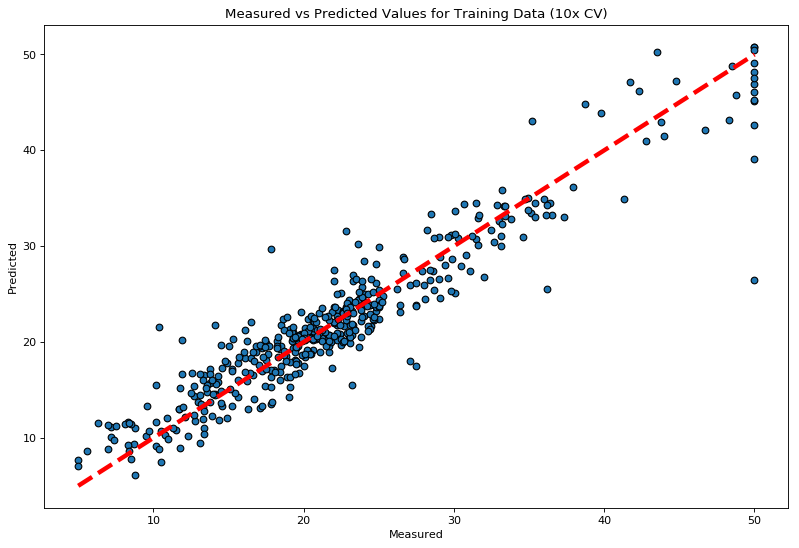

In [9]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7. Let's fit the GB model on Training data and perform prediction with the Test data 

In [0]:
gbRegressor_model = gbRegressor.fit(X_train,y_train)

y_predicted = gbRegressor_model.predict(X_test)

### 8. Model Evaluation on Test Data

In [11]:
r2_score = gbRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.7889960871580753

Mean Squared Error on test set : 24.12412035101647


### 9. Visualisation

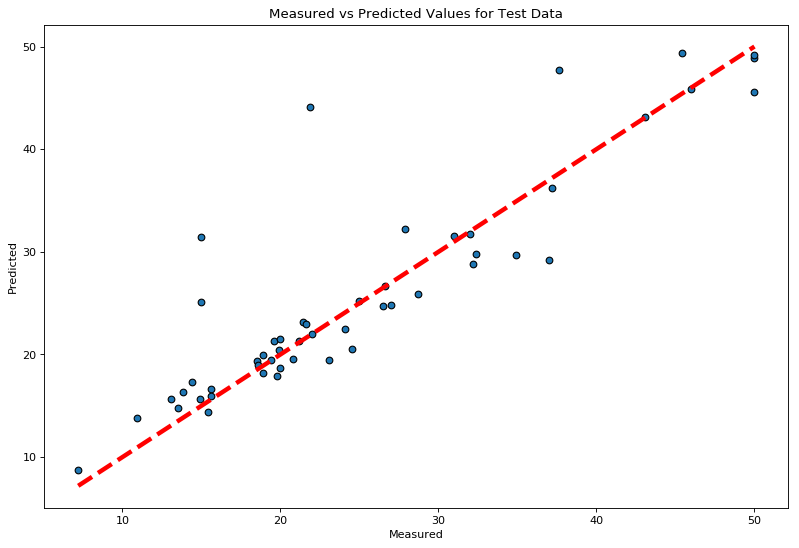

In [12]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

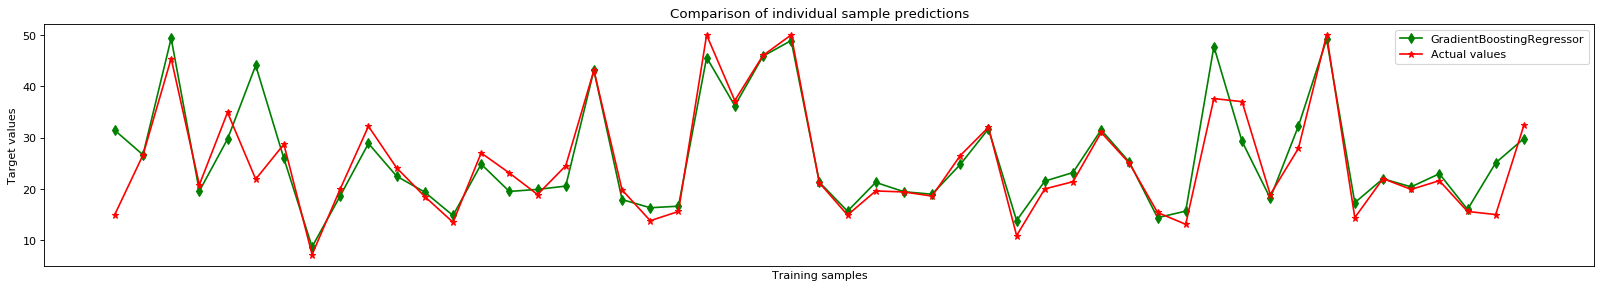

In [13]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='GradientBoostingRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

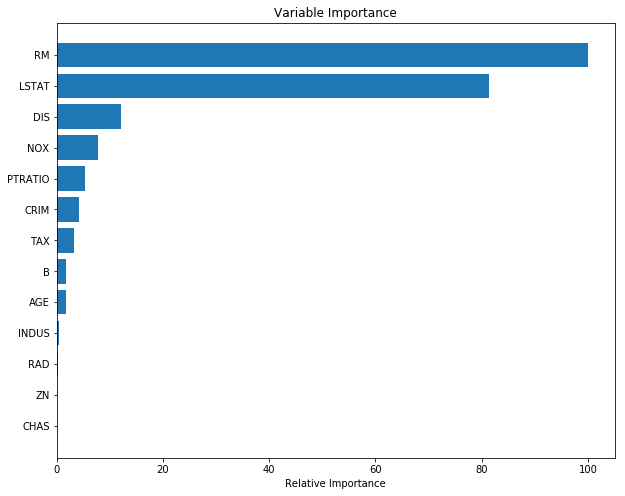

In [14]:
# Plot feature importance
feature_importance = gbRegressor_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()

### 10. Let's do Grid Search

In [0]:
#provide GB hyperparameters
gb_hyperparameters = {
    "n_estimators": [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [1, 3, 5],
#     'loss' : ['ls', 'lad', 'huber', 'quantile'],
}

nfolds = 10 #number of folds for CV
gbRegressor = ensemble.GradientBoostingRegressor(random_state=123) #initialise GB classifier

# create Grid search object
gs_gb_rgr = GridSearchCV(gbRegressor, gb_hyperparameters, 
                          n_jobs=10, cv=nfolds)

In [16]:
gs_gb_rgr.fit(X_train, y_train) #fit the grid search object

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [17]:
print(gs_gb_rgr.best_score_)
print(gs_gb_rgr.best_params_)

0.8845081375026305
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


In [0]:
best_parameters_gs = gs_gb_rgr.best_params_ #get the best parameters based on 10x CV grid search

### 11. Re-Initialise a Gradient Boosting Regressor

In [0]:
gbRegressor_best = ensemble.GradientBoostingRegressor(**best_parameters_gs) #intialise GB classifier with best set of parameters

### 12. Model Re-evaluation on Train data with best Parameters

In [20]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(gbRegressor_best, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(gbRegressor_best, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score with best parameters on train data: ",CV_score.mean())

Cross validation Score with best parameters on train data:  0.8869694445512936


### 13. Model Re-evaluation on Test data with best Parameters

In [0]:
gbRegressor_best_mdl= gbRegressor_best.fit(X_train, y_train) #fit the best GB classifier with training data

y_predicted = gbRegressor_best_mdl.predict(X_test) #Predict the outcomes with best GB classifier for test data

In [23]:
mdl_score = gbRegressor_best_mdl.score(X_test,y_test) #model score (test data)
print ("Model Score with best parameters on test data:",mdl_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error with best parameters on test set :",mse_score)

Model Score with best parameters on test data: 0.7970143237837457

Mean Squared Error with best parameters on test set : 23.207393723745295


# 1. House Sales in King County, USA dataset
[see description here](https://www.kaggle.com/harlfoxem/housesalesprediction)


### 1. Load data

In [25]:
#load data from local drive
housePriceData = pd.read_csv('https://raw.githubusercontent.com/cleysonl/IADS2019/master/Tree%20based%20Machine%20Learning%20Models/kc_house_data.csv')
housePriceData.shape

(21613, 21)

### 2. Explore Data


In [26]:
housePriceData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
housePriceData = housePriceData.drop(['id', 'date'], axis=1) #remove 'id' and 'date' variables
housePriceData.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
housePriceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [29]:
housePriceData.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 3. Split the data for Training and Testing

In [30]:
target = housePriceData['price'] #get the labels as targets and convert to numpy array
np.array(target, dtype=pd.Series)

array([221900.0, 538000.0, 180000.0, ..., 402101.0, 400000.0, 325000.0],
      dtype=object)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(housePriceData.drop(['price'],axis='columns'), target, test_size=0.2,random_state=123)
print(X_train.shape)
print(X_test.shape)

(17290, 18)
(4323, 18)


### 4. Let's do Grid Search

In [0]:
#provide GB hyperparameters
gb_hyperparameters = {
    "n_estimators": [100, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [1, 3],
#     'loss' : ['ls', 'lad', 'huber', 'quantile'],
}

nfolds = 10 #number of folds for CV
gbRegressor = ensemble.GradientBoostingRegressor(random_state=123) #initialise GB classifier

# create Grid search object
gs_gb_rgr = GridSearchCV(gbRegressor, gb_hyperparameters, cv=nfolds)

In [33]:
gs_gb_rgr.fit(X_train, y_train) #fit the grid search object

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [34]:
print(gs_gb_rgr.best_score_)
print(gs_gb_rgr.best_params_)

0.8785569969051218
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [0]:
best_parameters_gs = gs_gb_rgr.best_params_ #get the best parameters based on 10x CV grid search

### 5. Initialise a Gradient Boosting Regressor

In [0]:
gbRegressor_best = ensemble.GradientBoostingRegressor(**best_parameters_gs, random_state=123) #intialise GB classifier with best set of parameters

### 6. Model Re-evaluation on Train data with best Parameters

In [37]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(gbRegressor_best, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(gbRegressor_best, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score with best parameters on train data: ",CV_score.mean())

Cross validation Score with best parameters on train data:  0.8785569969051219


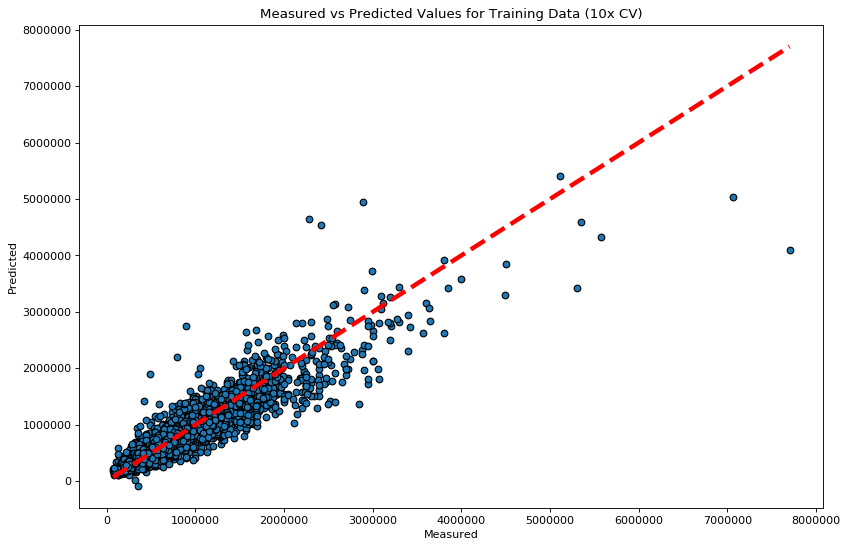

In [38]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7. Model Re-evaluation on Test data with best Parameters

In [0]:
gbRegressor_best_mdl= gbRegressor_best.fit(X_train, y_train) #fit the best GB classifier with training data

y_predicted = gbRegressor_best_mdl.predict(X_test) #Predict the outcomes with best GB classifier for test data

In [40]:
mdl_score = gbRegressor_best_mdl.score(X_test,y_test) #model score (test data)
print ("Model Score with best parameters on test data:",mdl_score)

model_error = 1- mdl_score
print ("\nModel Error with best parameters on test set :",model_error)

Model Score with best parameters on test data: 0.8976644972981748

Model Error with best parameters on test set : 0.10233550270182523


### 8. Visualisation

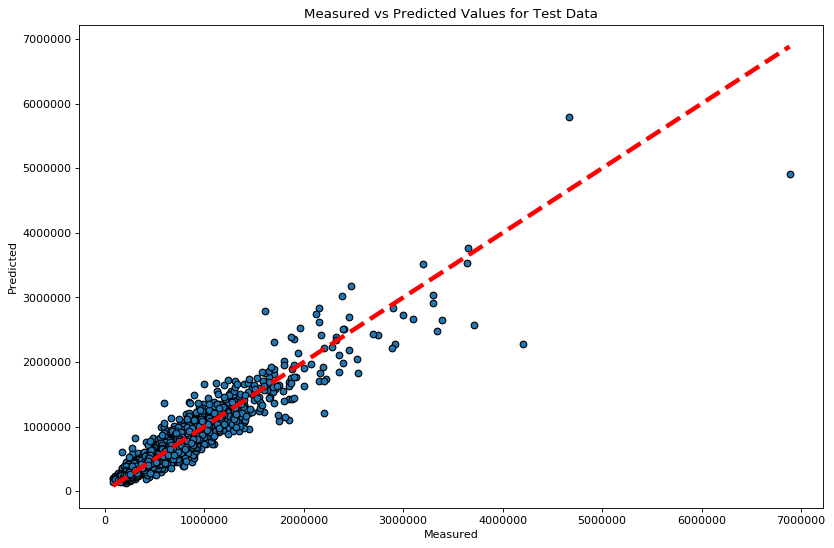

In [41]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

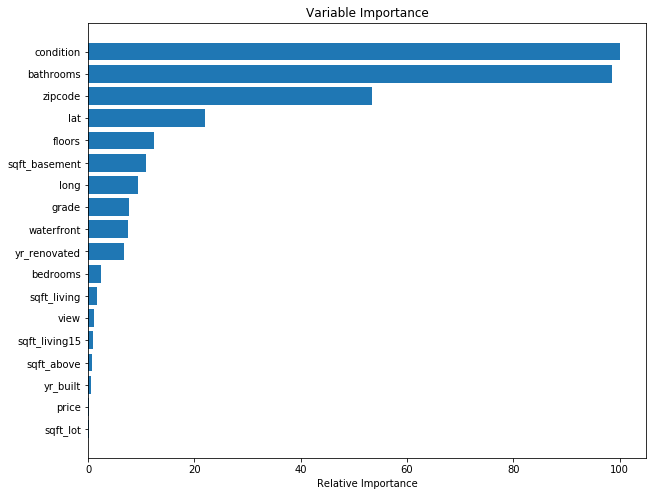

In [42]:
# Plot feature importance
feature_importance = gbRegressor_best_mdl.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

array_features = np.asarray(list(housePriceData))
plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, array_features[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()